<a href="https://www.kaggle.com/code/kapturovalexander/kapturov-s-solution-of-ps-s4e5?scriptVersionId=196880568" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://whyy.org/wp-content/uploads/2021/09/AP_hurricane_ida_flooding_storm_090221_04-768x512.jpg)

# <span style="color: #44944A">I really sympathize with the people who had to go through the flood. I hope the governments of such countries will do everything possible to help people restore their property and life stability!

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


## *Your Goal*: The goal of this competition is to predict the probability of a region flooding based on various factors.

<font face="Bahnschrift Condensed" style="font-size: 14pt; color: brown">
Flood detection refers to the process of identifying, monitoring, and alerting authorities or individuals about the presence or likelihood of flooding in a particular area. It involves the use of various technologies and methods to detect, predict, and mitigate the impacts of floods.
</font>

![](https://www.kaggle.com/competitions/73278/images/header)

# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; background-image: url(https://www.kaggle.com/competitions/73278/images/header); color: white; font-size: 50px;">Table of Contents</span>

- [Import libraries](#1)
- [Open data files](#2)
- [Show first 5 lines of train data](#3)
- [Compare original train and competition train](#3.1)
- [Concatenate original train with competition train](#3.2)
- [Figure out how much duplicates in data](#3.3)
- [Shapes of train and test data](#4)
- [Display descriptive statistics of train data](#5)
- [Check the number of gaps for each feature](#6)
- [One-hot encoding](#7.3)
- [Display histograms of distribution](#8)
- [Let's count target of train data](#9)
- [Transform the data with log1p](#10)
- [Feature importance](#10.2)
- [Build a heat map of correlations](#11)
- [Define base models with tuned hyperparameters](#12)
- [Defining the meta-model with tuned hyperparameters](#13)
- [Creating and fitting the stacking model](#14)
- [Predict validation set and calculate metrics score](#15)
- [Predict the test data](#16)
- [Build DataFrame and make submission](#17)
- [Save the model into pickle file](#18)

<a id='1'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">🌊 Import libraries</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from optuna.samplers import TPESampler
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

![](https://s.france24.com/media/display/f441dde2-f637-11ed-aeef-005056bf30b7/w:980/p:16x9/000_33FG2YF.jpg)

<a id='2'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">⚠️ Open data files</span>

In [3]:
# original_train = pd.read_csv('/kaggle/input/flood-prediction-factors/flood.csv')

train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

<a id='3'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">⛈️ Show first 5 lines of train data</span>

In [4]:
# Show all properties on display
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## <span style="color: #A8E4A0">Let's look at quantity of scores for each feature

id
0          1
745303     1
745309     1
745308     1
745307     1
          ..
372658     1
372659     1
372660     1
372661     1
1117956    1
Name: count, Length: 1117957, dtype: int64



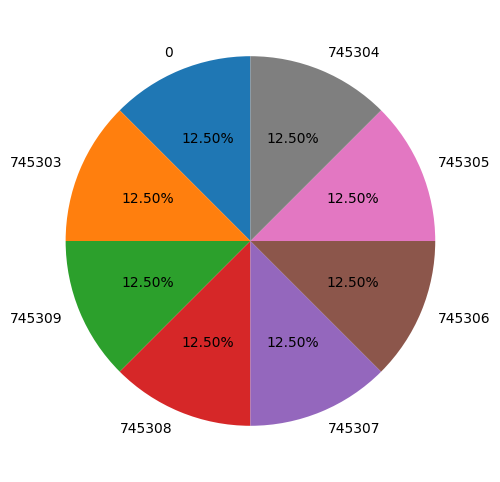

MonsoonIntensity
5     220936
4     214344
6     169080
3     160574
7     109210
2      86683
8      65954
9      33515
1      28946
10     14040
11      5851
0       5431
12      2062
13       729
14       391
15       169
16        42
Name: count, dtype: int64



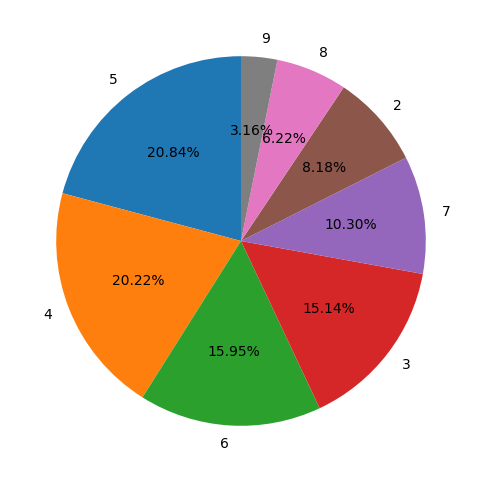

TopographyDrainage
5     221252
4     213368
3     161989
6     159003
7     102681
2      90058
8      72000
9      37544
1      29422
10     15524
11      6177
0       5541
12      2199
13       705
14       333
15       106
16        42
17        10
18         3
Name: count, dtype: int64



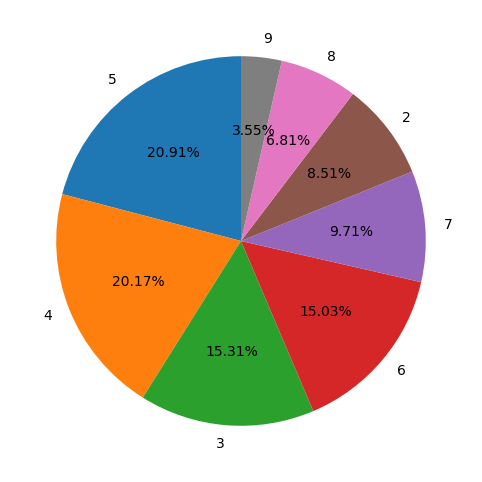

RiverManagement
5     218216
4     214079
6     167368
3     160049
7     108538
2      83782
8      71204
9      36232
1      28872
10     15170
11      5773
0       5407
12      2120
13       715
14       297
15        92
16        43
Name: count, dtype: int64



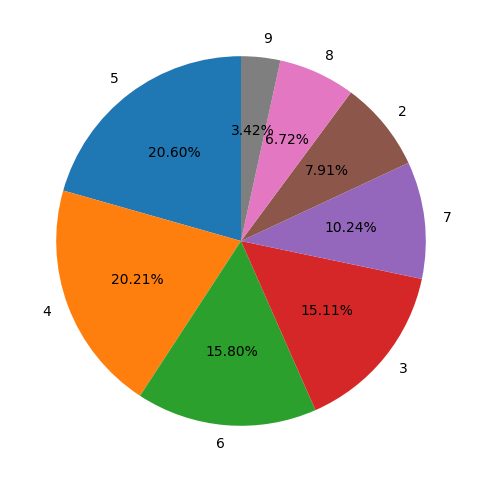

Deforestation
4     219733
5     217793
6     169175
3     157331
7     109039
2      85948
8      69237
9      34585
1      26881
10     13968
11      5706
0       5327
12      2079
13       706
14       293
15       115
16        35
17         6
Name: count, dtype: int64



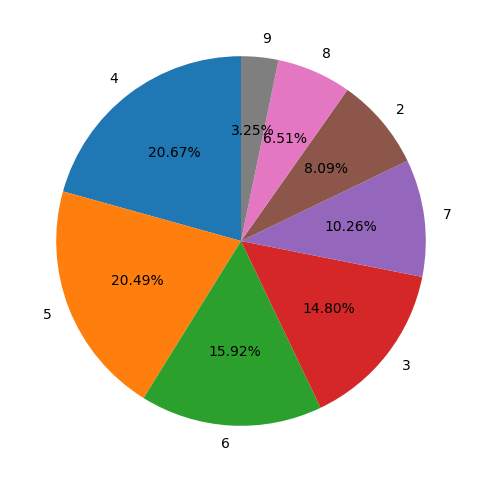

Urbanization
5     216722
4     212438
6     166703
3     162234
7     107693
2      86122
8      69295
9      36854
1      29672
10     15690
11      5689
0       5350
12      2211
13       791
14       313
15       137
16        36
17         7
Name: count, dtype: int64



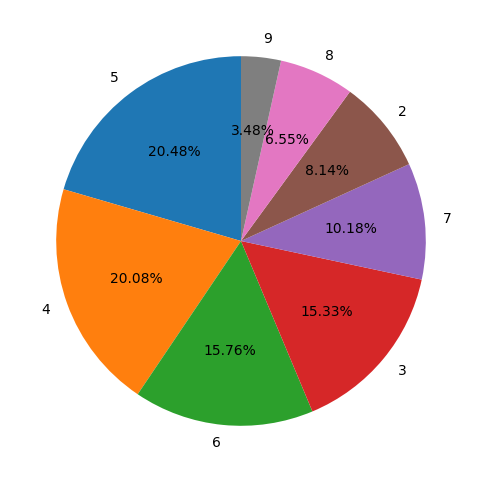

ClimateChange
5     218995
4     214268
6     169316
3     159728
7     107802
2      88158
8      69171
9      34687
1      27326
10     14457
11      5516
0       5347
12      2063
13       729
14       260
15        96
16        35
17         3
Name: count, dtype: int64



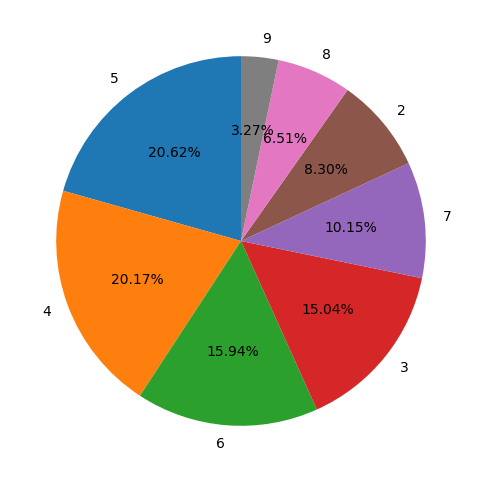

DamsQuality
5     218237
4     216308
6     164786
3     158316
7     108185
2      84763
8      71757
9      35903
1      28605
10     15121
11      6504
0       5878
12      2371
13       738
14       334
15       124
16        27
Name: count, dtype: int64



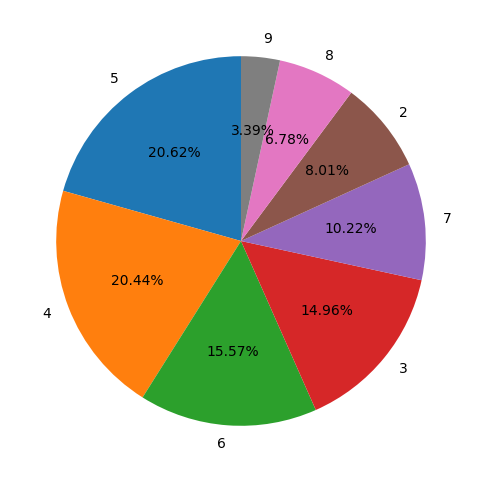

Siltation
5     222270
4     215232
6     164780
3     160419
7     106481
2      87322
8      68231
9      35460
1      28487
10     14815
11      5700
0       5381
12      2108
13       781
14       320
15       142
16        28
Name: count, dtype: int64



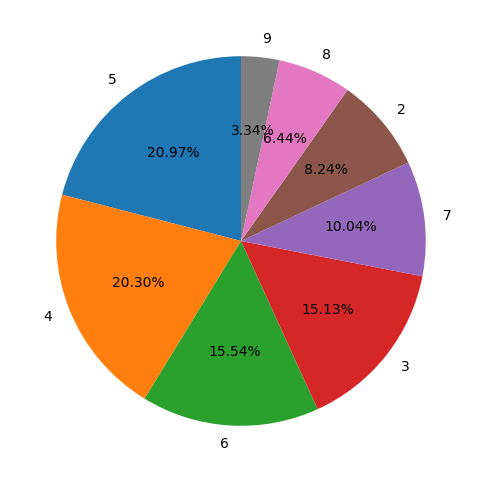

AgriculturalPractices
5     216644
4     214366
6     168426
3     160403
7     109213
2      85659
8      69347
9      36004
1      28587
10     14622
11      5900
0       5680
12      2085
13       631
14       254
15        96
16        40
Name: count, dtype: int64



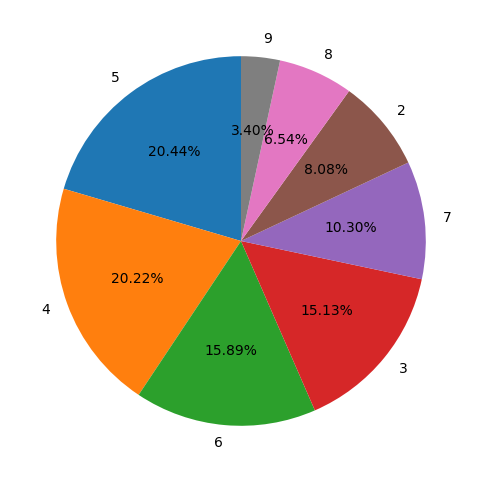

Encroachments
5     219971
4     219708
3     160683
6     158864
7     106434
2      84628
8      71237
9      37312
1      27979
10     15952
11      6262
0       5531
12      2145
13       750
14       343
15       110
16        33
17        13
18         2
Name: count, dtype: int64



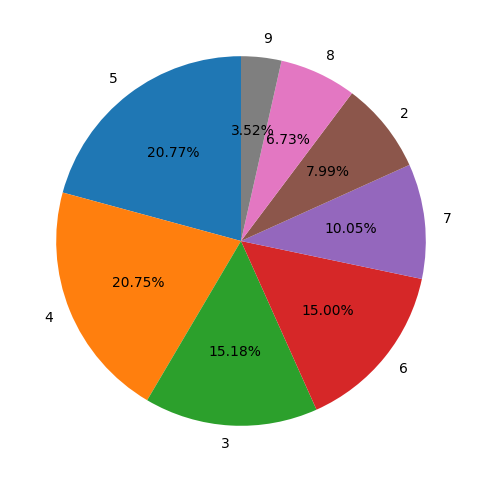

IneffectiveDisasterPreparedness
4     217365
5     215502
3     162862
6     162108
7     107059
2      85851
8      73046
9      36869
1      27756
10     15184
11      5725
0       5410
12      2055
13       673
14       336
15       124
16        32
Name: count, dtype: int64



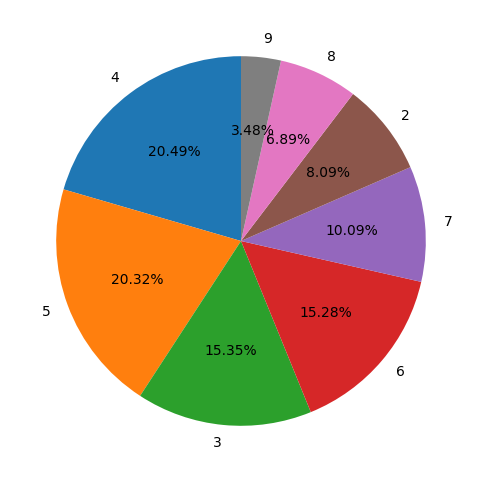

DrainageSystems
5     217753
4     216278
6     167358
3     159355
7     108156
2      84440
8      71360
9      34274
1      28923
10     14737
11      6240
0       5582
12      2203
13       786
14       325
15       133
16        44
17        10
Name: count, dtype: int64



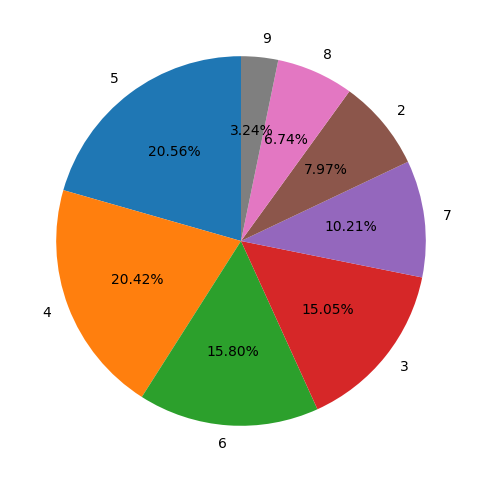

CoastalVulnerability
5     215378
4     213263
6     164640
3     162674
7     108310
2      84481
8      73577
9      35817
1      29108
10     14753
11      6602
0       5747
12      2370
13       761
14       332
15        99
16        38
17         7
Name: count, dtype: int64



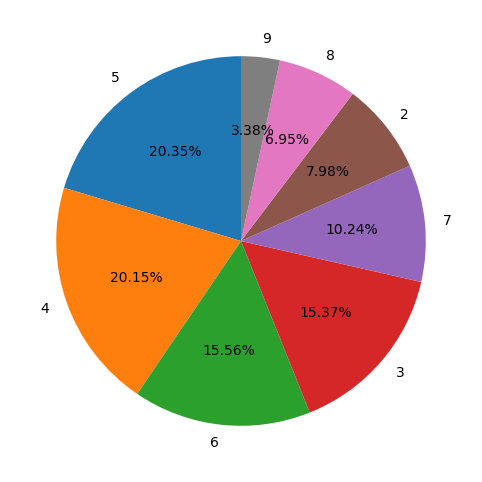

Landslides
5     213811
4     212833
6     164085
3     163932
7     109608
2      88129
8      72274
9      35411
1      29051
10     14442
11      5618
0       5516
12      2114
13       699
14       297
15       106
16        31
Name: count, dtype: int64



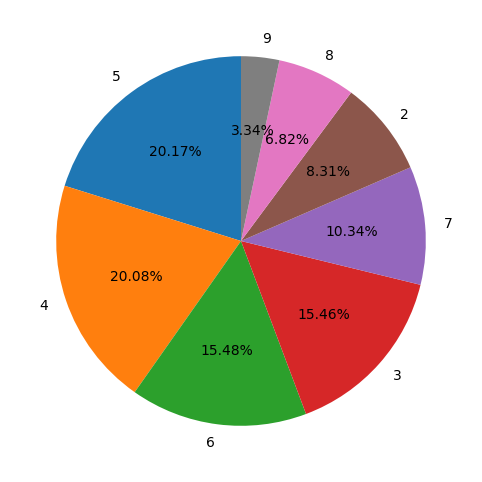

Watersheds
5     219756
4     213627
3     163564
6     159072
7     107309
2      88319
8      71822
9      36087
1      28867
10     14885
11      5734
0       5404
12      2227
13       811
14       329
15        94
16        50
Name: count, dtype: int64



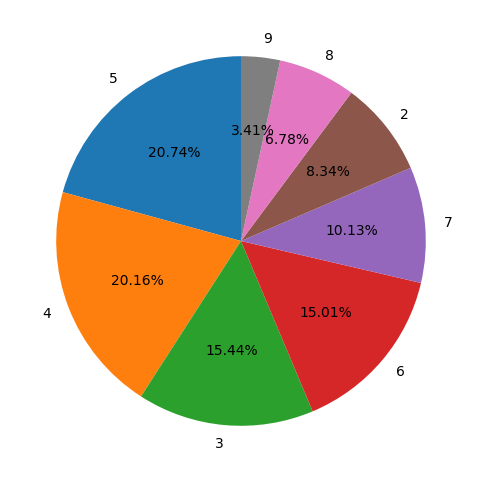

DeterioratingInfrastructure
4     218713
5     213578
6     168782
3     162850
7     107019
2      85513
8      67551
9      35832
1      29511
10     14684
11      5788
0       4953
12      2110
13       639
14       285
15       111
16        34
17         4
Name: count, dtype: int64



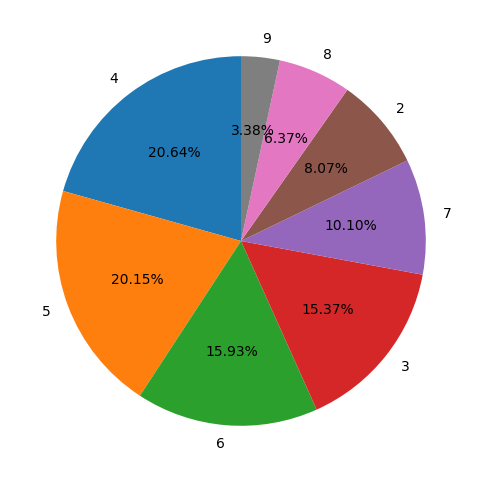

PopulationScore
4     221136
5     213102
6     163538
3     161487
7     106364
2      87742
8      72443
9      34422
1      28093
10     14804
11      5852
0       5536
12      2200
13       779
14       338
15        73
16        38
17         9
18         1
Name: count, dtype: int64



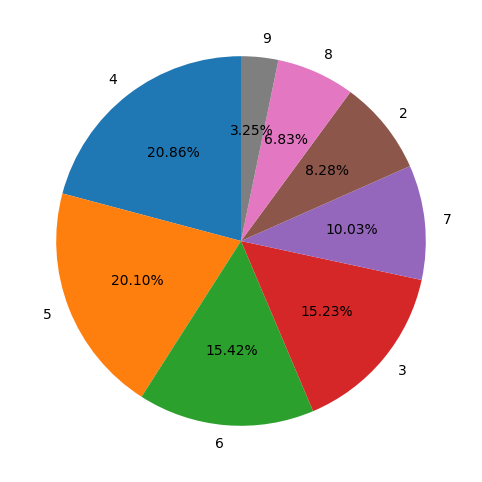

WetlandLoss
4     217045
5     214587
6     167265
3     161270
7     109524
2      84515
8      71347
9      34947
1      27958
10     15041
11      5993
0       5192
12      2141
13       689
14       299
15       102
16        37
17         3
18         1
19         1
Name: count, dtype: int64



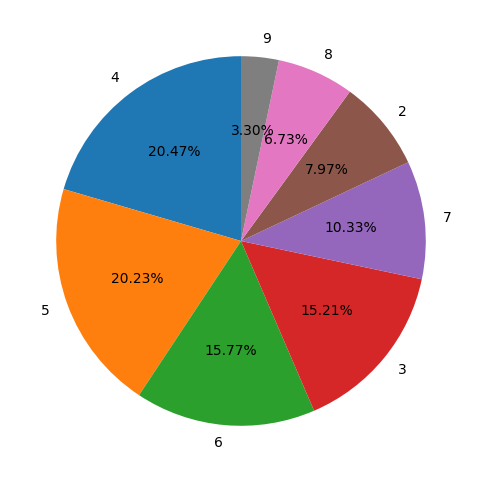

InadequatePlanning
5     217756
4     214851
3     165051
6     162099
7     106401
2      85421
8      71588
9      36289
1      27889
10     15694
11      5919
0       5619
12      2135
13       717
14       358
15       132
16        38
Name: count, dtype: int64



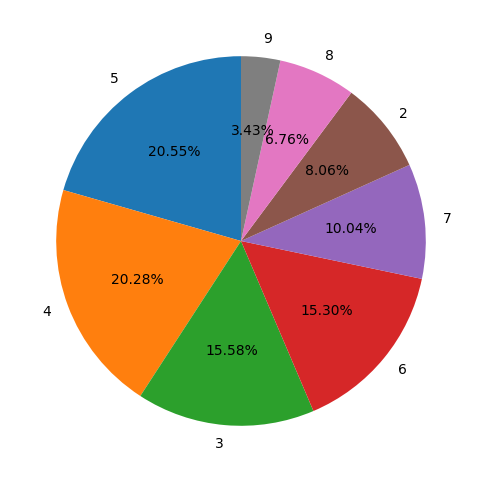

PoliticalFactors
4     215557
5     211264
3     164017
6     163682
7     108315
2      86873
8      72800
9      35675
1      28786
10     15286
11      6332
0       5995
12      2278
13       691
14       273
15        90
16        43
Name: count, dtype: int64



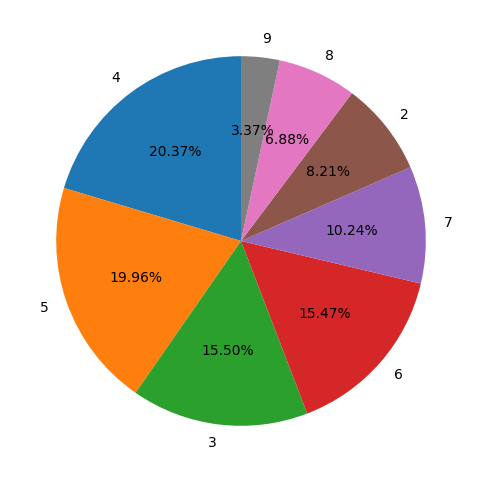

In [5]:
for feature in train.columns[:-1]:
    print(train[feature].value_counts(), end='\n\n')
    plt.figure(figsize=(9, 6))
    label_counts = train[feature].value_counts()
    plt.pie(label_counts[:8], labels=label_counts.index[:8], autopct='%1.2f%%', startangle=90)
    plt.show()

## <span style="color: #A8E4A0">Almost every where most frequently scores are 5, 4, 6, 3 and 7

In [6]:
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


## <span style="color: #A8E4A0">Let's also add feature which will keep sum of all other scores

In [7]:
train['Total_score'] = sum([train[feature] for feature in train.columns[:-1]])
# original_train['Total_score'] = sum([original_train[feature] for feature in original_train.columns[:-1]])
test['Total_score'] = sum([test[feature] for feature in test.columns])

train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,Total_score
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445,94
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450,95
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530,101
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535,107
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415,76


In [8]:
train.Total_score.value_counts()[:15]

Total_score
23567      8
1035380    8
308259     7
1025319    7
843396     7
534222     7
402653     7
926678     7
768782     7
238785     7
400380     7
827513     7
637719     7
556979     7
1023726    7
Name: count, dtype: int64

In [9]:
train[train.columns[-2:]]

,FloodProbability,Total_score
0,0.445,94
1,0.450,95
2,0.530,101
3,0.535,107
4,0.415,76
...,...,...
1117952,0.495,1118051
1117953,0.480,1118049
1117954,0.485,1118052
1117955,0.495,1118054


## <span style="color: #A8E4A0">Target feature is **FloodProbability**

<a id='3.1'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">😨 Compare original train and competition train</span>

In [10]:
# print(original_train.shape)
# original_train.columns.tolist()

## <span style="color: #A8E4A0">In original data there is no **id** column

In [11]:
print(train.shape)
train.columns.tolist()

(1117957, 23)


['id',
 'MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors',
 'FloodProbability',
 'Total_score']

<a id='3.2'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">🚣 Concatenate original train with competition train

In [12]:
submission_id = test.id

train.drop(columns='id', axis=1, inplace=True)
test.drop(columns='id', axis=1, inplace=True)

In [13]:
# train = pd.concat(objs=[train, original_train])
# train.shape

<a id='3.3'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">🌊 Figure out how much duplicates in data

In [14]:
train_duplicates_number = train[train.duplicated()]
test_duplicates_number = test[test.duplicated()]
                             
print(len(train_duplicates_number))
print(len(test_duplicates_number))

0
0


<a id='4'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0">🚨 Shapes of train and test data</span>

In [15]:
print(f'Train data: {train.shape}')
print(f'Test data: {test.shape}\n')

train_data_percentage = np.round(train.shape[0] / (train.shape[0] + test.shape[0]), 4)
print(f'Train data consists of {train_data_percentage * 100:.2f}% of all observations')
print(f'Test data consists of {(1 - train_data_percentage) * 100:.2f}% of all observations')

Train data: (1117957, 22)
Test data: (745305, 21)

Train data consists of 60.00% of all observations
Test data consists of 40.00% of all observations


![](https://akm-img-a-in.tosshub.com/lingo/itne/images/story/202208/new_project_18-sixteen_nine.jpg?size=948:533)

<a id='5'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">🚧 Display descriptive statistics of train data</span>

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


In [17]:
pd.crosstab(index=train['FloodProbability'], columns=train['PoliticalFactors'])

PoliticalFactors,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
FloodProbability,,,,,,,,,,,,,,,,,
0.285,1,0,1,1,8,5,1,2,0,1,0,0,0,0,0,0,0
0.315,0,4,5,14,9,5,2,1,1,1,0,0,0,0,0,0,0
0.320,1,7,17,18,21,11,4,0,0,0,0,0,0,0,0,0,0
0.325,0,4,15,12,14,10,4,0,2,0,0,0,0,0,0,0,0
0.330,2,11,16,25,13,10,2,2,0,1,0,0,0,0,0,0,0
0.335,1,2,10,7,15,6,4,1,2,0,0,0,0,0,0,0,0
0.340,7,22,39,55,48,38,18,12,2,2,0,0,0,0,0,0,0
0.345,8,17,40,51,45,36,33,11,4,3,1,0,0,0,0,1,0
0.350,12,35,97,124,115,65,30,17,13,3,1,3,0,0,0,0,0


<a id='6'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">🏥 Check the number of gaps for each feature</span>

In [18]:
print('TRAIN data\n')
print(f'{train.isna().sum()}\n\n\n')

print('TEST data\n')
print(test.isna().sum())

TRAIN data

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
Total_score                        0
dtype: int64



TEST data

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0

## <span style="color: #A8E4A0">There is no any gaps in the data

![](https://img.theweek.in/content/dam/week/week/news/world/images/2024/4/6/Russia-floods-reuters.jpg)

<a id='7'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">🌧️ Data types of training set</span>

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

<a id="7.3"></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">🌊 One-hot encoding

In [20]:
X = pd.get_dummies(train, drop_first=True, dtype=int)
test = pd.get_dummies(test, drop_first=True, dtype=int)

## <span style="color: #A8E4A0">Boostings and Random Forest can tackle with data without normalization

<a id='8'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">⚠️ Display histograms of distribution</span>

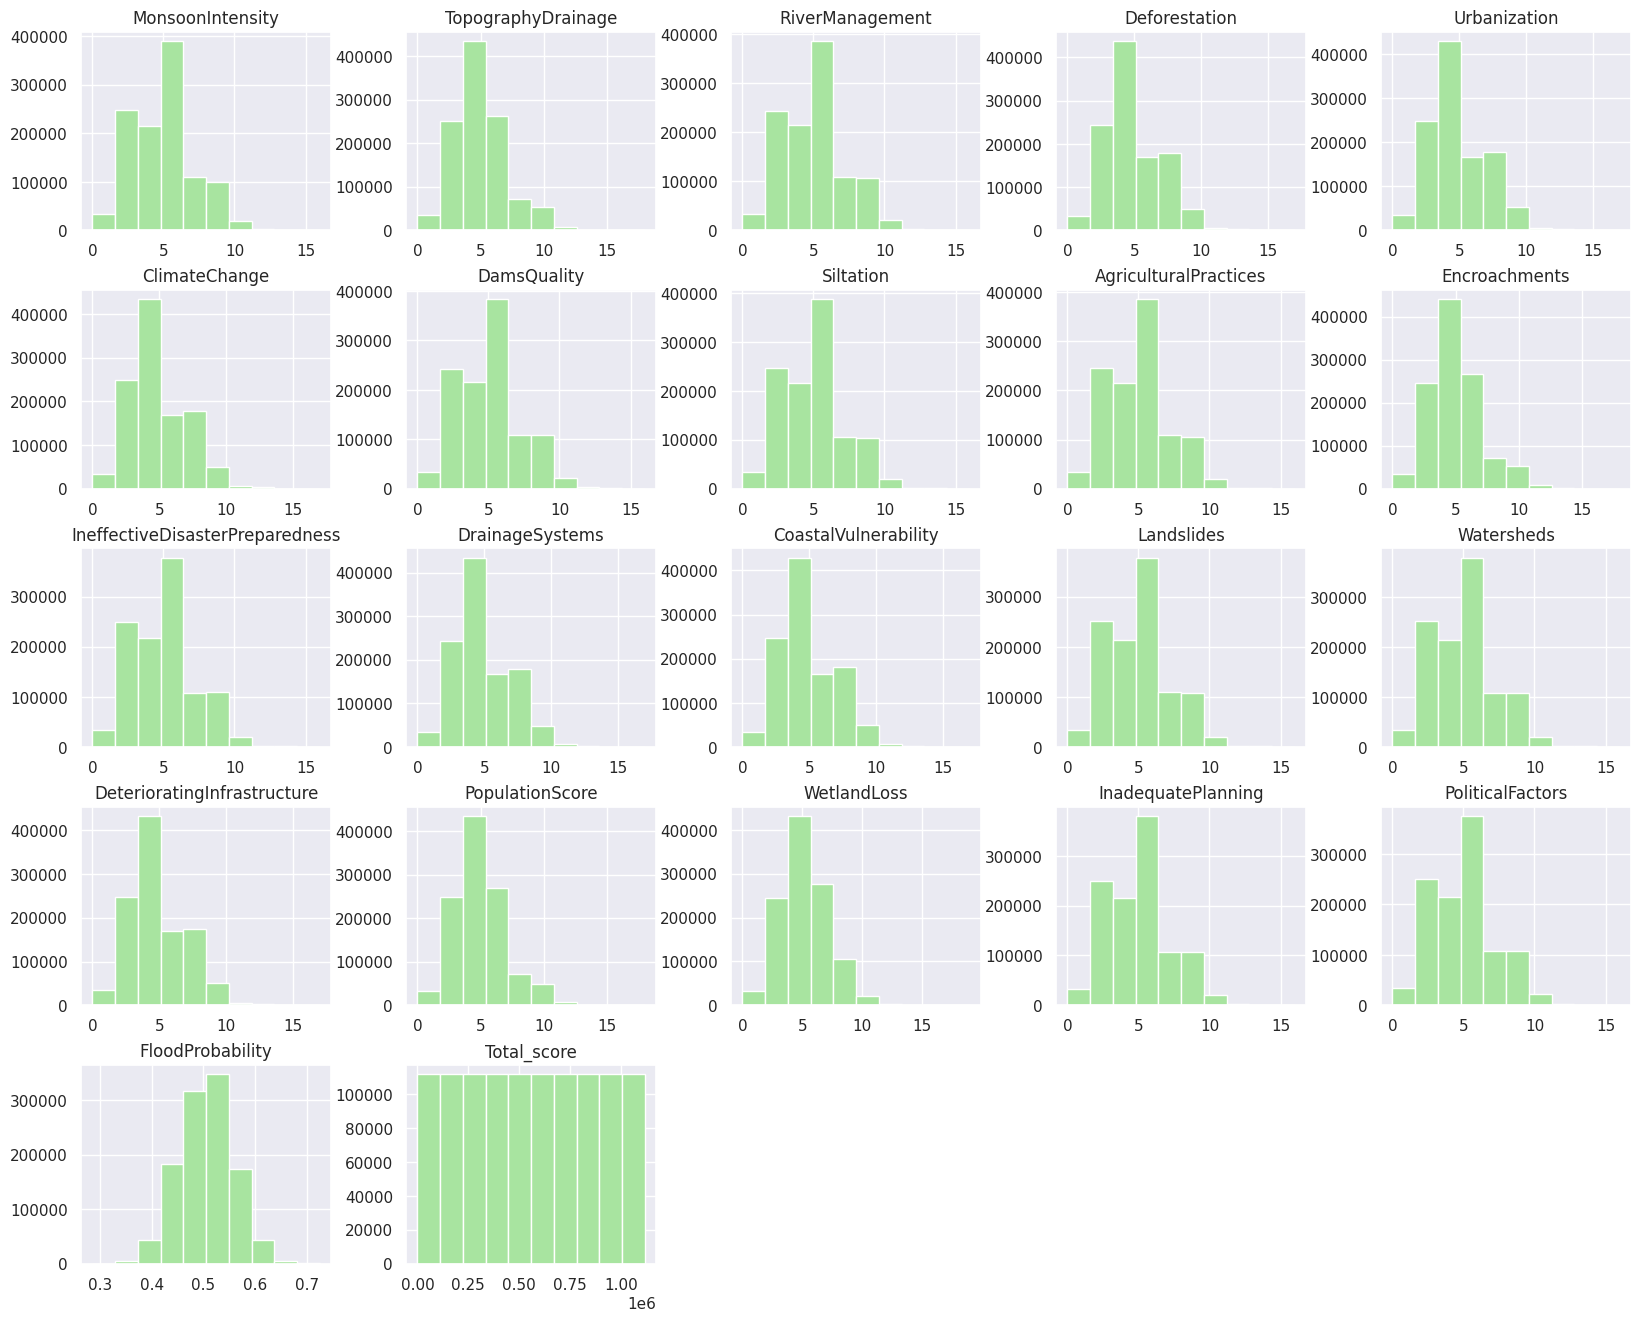

In [21]:
sns.set(rc={'figure.figsize': (20, 16)})
train.hist(color='#A8E4A0');

<a id='10.2'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">⛈️ Feature importance</span>

In [22]:
# We can check mean values of all features for flood probability more than 0.7
train[train.FloodProbability > 0.7].mean()

MonsoonIntensity                        6.775000
TopographyDrainage                      6.416667
RiverManagement                         7.050000
Deforestation                           6.500000
Urbanization                            6.341667
ClimateChange                           6.616667
DamsQuality                             6.608333
Siltation                               6.875000
AgriculturalPractices                   6.783333
Encroachments                           6.666667
IneffectiveDisasterPreparedness         7.008333
DrainageSystems                         6.716667
CoastalVulnerability                    6.575000
Landslides                              6.650000
Watersheds                              6.541667
DeterioratingInfrastructure             6.733333
PopulationScore                         7.175000
WetlandLoss                             6.625000
InadequatePlanning                      6.525000
PoliticalFactors                        6.725000
FloodProbability    

In [23]:
# Split the train data into X and y
X = X.drop(['FloodProbability'], axis=1)
y = train.FloodProbability

In [24]:
# %%time
# # I figured out best hyperparameters previously
# best_cat = CatBoostRegressor(
#     random_state=27
# )
    
# best_cat.fit(X, y)

In [25]:
# importance = best_cat.feature_importances_

# feature_importance = pd.DataFrame(data=importance, index=X.columns, columns=['importance']) \
#     .sort_values(ascending=True, by='importance')

# feature_importance.plot(kind='barh', figsize=(12, 8), color='#A8E4A0');

## <span style="color: #A8E4A0">All features have almost same importance

<a id='11'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">😨 Build a heat map of correlations</span>

In [26]:
X.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'Total_score'],
      dtype='object')

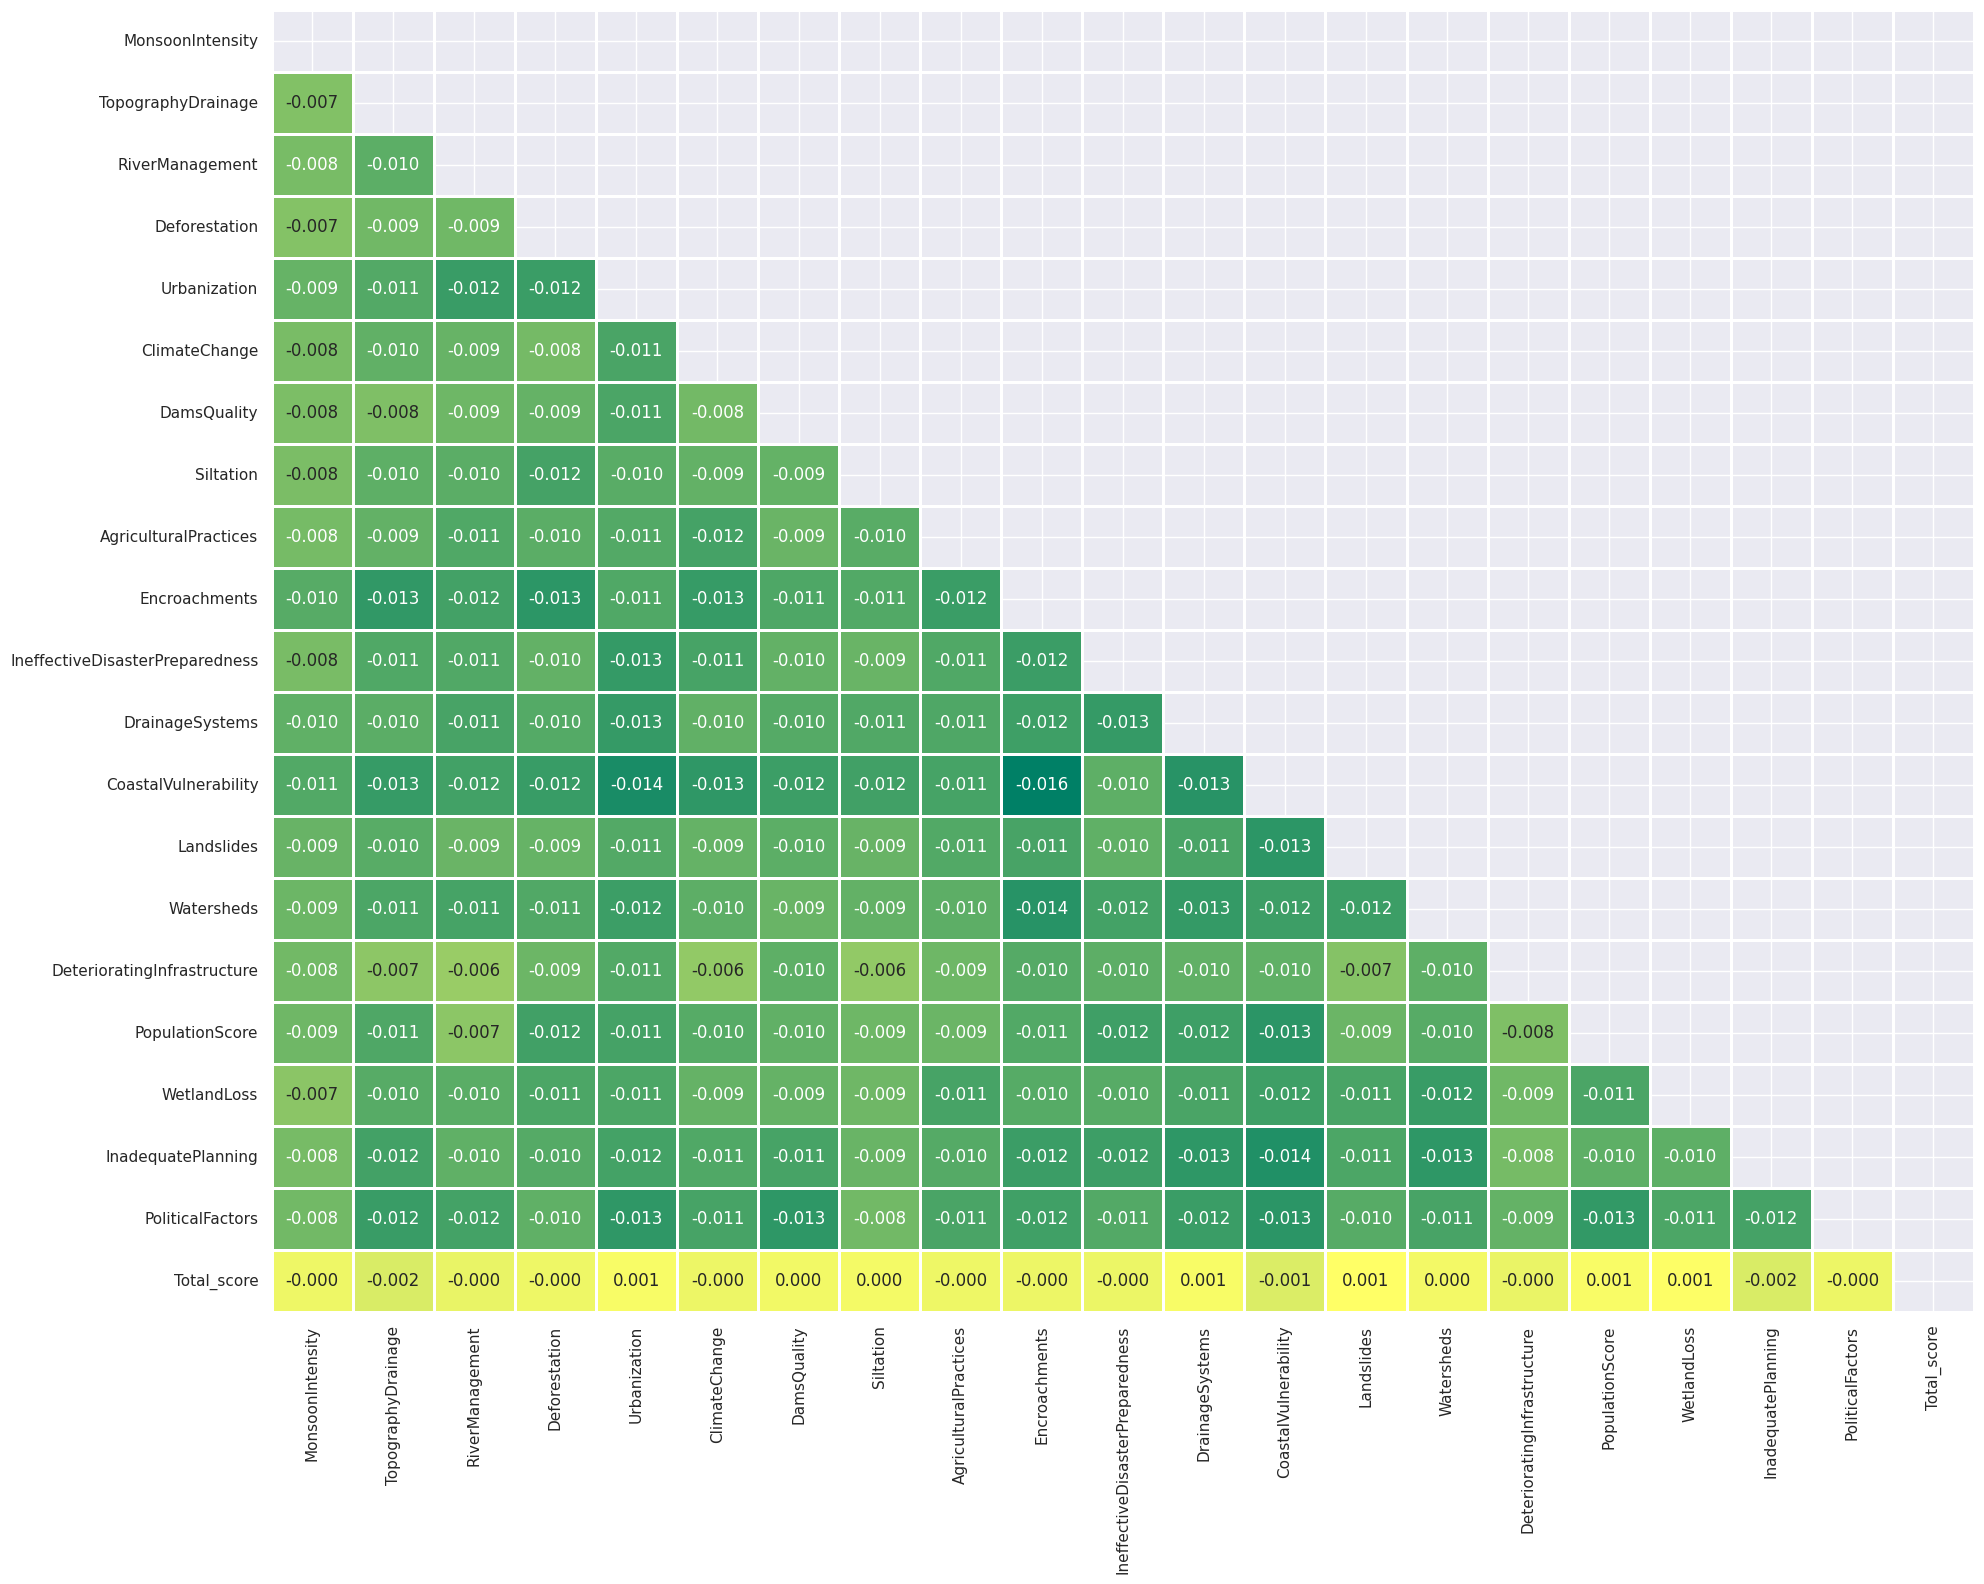

In [27]:
# Training dataset
numeric_columns_train = X.select_dtypes(include=np.number)
corr_train = numeric_columns_train.corr(method='pearson')
mask_train = np.triu(np.ones_like(corr_train))
sns.heatmap(corr_train, annot=True, fmt='.3f', mask=mask_train, cmap='summer', cbar=None, linewidth=2)
plt.tight_layout()
plt.show()

## <span style="color: #A8E4A0">There is no high correlated features

<a id='12'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">🚣 Define base models</span>

## <p style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; background-image: url(https://www.kaggle.com/competitions/73278/images/header); color: white; font-size: 30px; padding: 5px 5px 5px 5px">Ridge with Optuna</p>

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/2GzY9lVDj2Jdf8de7Kgc9Q.png)

In [28]:
# %%time
# def objective(trial):
#     model = Ridge(
#         alpha = trial.suggest_float('alpha', 0.0, 1.0),
#         solver = trial.suggest_categorical('solver', ['saga', 'sparse_cg', 'auto', 'sag', 'svd', 'cholesky', 'lsqr']),
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return r2_score(y_test, y_pred)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# optuna.logging.set_verbosity(optuna.logging.WARNING)

# sampler = TPESampler(seed=27)
# study = optuna.create_study(study_name="linear_regression", direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=10)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")

# for key, value in trial.params.items():
#     print(f"    {key}: {value}")
# print()

"""
Number of finished trials:  10
Best trial:
  Value:  0.8497187538861316
  Params: 
    alpha: 0.4257214105188958
    solver: svd

CPU times: user 45min 47s, sys: 5.51 s, total: 45min 52s
Wall time: 45min 45s
"""

'\nNumber of finished trials:  10\nBest trial:\n  Value:  0.8497187538861316\n  Params: \n    alpha: 0.4257214105188958\n    solver: svd\n\nCPU times: user 45min 47s, sys: 5.51 s, total: 45min 52s\nWall time: 45min 45s\n'

## <p style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; background-image: url(https://www.kaggle.com/competitions/73278/images/header); color: white; font-size: 30px; padding: 5px 5px 5px 5px">CatBoost with Optuna</p>

In [29]:
# %%time
# def objective(trial):
#     model = CatBoostRegressor(
#         iterations=trial.suggest_int("iterations", 400, 1000),
#         learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
#         colsample_bylevel=trial.suggest_float("colsample_bylevel", 0.05, 1.0),
#         min_data_in_leaf=trial.suggest_int("min_data_in_leaf", 1, 100),
#         depth=trial.suggest_int("depth", 4, 14),
#         l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
#         verbose=False,
#         random_state=27
#     )
    
#     kf = KFold(n_splits=5, shuffle=True, random_state=27)
#     r2_scores = []
    
#     for train_index, val_index in kf.split(X_train):
#         X_kf_train, X_kf_val = X_train.iloc[train_index], X_train.iloc[val_index]
#         y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
#         model.fit(X_kf_train, y_kf_train)
#         y_kf_pred = model.predict(X_kf_val)
#         r2 = r2_score(y_kf_val, y_kf_pred)
#         r2_scores.append(r2)
    
#     mean_r2_score = np.mean(r2_scores)
#     return mean_r2_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# optuna.logging.set_verbosity(optuna.logging.WARNING)

# sampler = TPESampler(seed=27)
# study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=5)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")

# for key, value in trial.params.items():
#     print(f"    {key}: {value}")
# print()

"""
Number of finished trials:  10
Best trial:
  Value:  0.8519310944839222
  Params: 
    iterations: 824
    learning_rate: 0.07024611544300416
    colsample_bylevel: 0.32374524982071545
    min_data_in_leaf: 69
    depth: 9
    l2_leaf_reg: 5.938240087759686

CPU times: user 6h 21min 14s, sys: 9min 2s, total: 6h 30min 17s
Wall time: 2h 12s
"""

'\nNumber of finished trials:  10\nBest trial:\n  Value:  0.8519310944839222\n  Params: \n    iterations: 824\n    learning_rate: 0.07024611544300416\n    colsample_bylevel: 0.32374524982071545\n    min_data_in_leaf: 69\n    depth: 9\n    l2_leaf_reg: 5.938240087759686\n\nCPU times: user 6h 21min 14s, sys: 9min 2s, total: 6h 30min 17s\nWall time: 2h 12s\n'

In [30]:
# %%time
# def objective(trial):
#     model = CatBoostRegressor(
#         iterations=trial.suggest_int("iterations", 400, 1000),
#         learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
#         colsample_bylevel=trial.suggest_float("colsample_bylevel", 0.05, 1.0),
#         min_data_in_leaf=trial.suggest_int("min_data_in_leaf", 1, 100),
#         depth=trial.suggest_int("depth", 4, 14),
#         l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
#         verbose=False,
#         random_state=27
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return np.sqrt(r2_score(y_test, y_pred))


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# optuna.logging.set_verbosity(optuna.logging.WARNING)

# sampler = TPESampler(seed=27)
# study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=10)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")

# for key, value in trial.params.items():
#     print(f"    {key}: {value}")
# print()

"""
Number of finished trials:  2
Best trial:
  Value:  0.922180732174001
  Params: 
    iterations: 1335
    learning_rate: 0.0425762572228653
    colsample_bylevel: 0.7486274256896956
    min_data_in_leaf: 87
    depth: 8
    l2_leaf_reg: 62.311229612297524

CPU times: user 1h 16min 33s, sys: 46 s, total: 1h 17min 19s
Wall time: 22min 23s
"""

'\nNumber of finished trials:  2\nBest trial:\n  Value:  0.922180732174001\n  Params: \n    iterations: 1335\n    learning_rate: 0.0425762572228653\n    colsample_bylevel: 0.7486274256896956\n    min_data_in_leaf: 87\n    depth: 8\n    l2_leaf_reg: 62.311229612297524\n\nCPU times: user 1h 16min 33s, sys: 46 s, total: 1h 17min 19s\nWall time: 22min 23s\n'

## <p style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; background-image: url(https://www.kaggle.com/competitions/73278/images/header); color: white; font-size: 30px; padding: 5px 5px 5px 5px">XGBoost with Optuna</p>

In [31]:
# %%time
# def objective(trial):
#     model = XGBRegressor(
#         max_depth=trial.suggest_int('max_depth', 1, 100),
#         learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
#         n_estimators=trial.suggest_int('n_estimators', 1000, 2000),
#         min_child_weight=trial.suggest_int('min_child_weight', 1, 10),
#         gamma=trial.suggest_float('gamma', 1e-8, 1.0, log=True),
#         subsample=trial.suggest_float('subsample', 0.01, 1.0, log=True),
#         colsample_bytree=trial.suggest_float('colsample_bytree', 0.01, 1.0, log=True),
#         reg_alpha=trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
#         reg_lambda=trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
#         use_label_encoder=False,
#         random_state=27
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     try:
#         return r2_score(y_test, y_pred)
#     except Exception as e:
#         print(e)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# optuna.logging.set_verbosity(optuna.logging.WARNING)

# sampler = TPESampler(seed=27)
# study = optuna.create_study(study_name="xgb", direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=20)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")
# print()

"""
Number of finished trials:  20
Best trial:
  Value:  0.8526539882405902
  Params: 
    max_depth: 13
    learning_rate: 0.22472048294428892
    n_estimators: 1755
    min_child_weight: 10
    gamma: 8.58031910185836e-07
    subsample: 0.8936985751131682
    colsample_bytree: 0.04050040446078567
    reg_alpha: 0.16025160863896398
    reg_lambda: 6.875124639971543e-08

CPU times: user 2h 31s, sys: 9.36 s, total: 2h 40s
Wall time: 30min 51s
"""

'\nNumber of finished trials:  20\nBest trial:\n  Value:  0.8526539882405902\n  Params: \n    max_depth: 13\n    learning_rate: 0.22472048294428892\n    n_estimators: 1755\n    min_child_weight: 10\n    gamma: 8.58031910185836e-07\n    subsample: 0.8936985751131682\n    colsample_bytree: 0.04050040446078567\n    reg_alpha: 0.16025160863896398\n    reg_lambda: 6.875124639971543e-08\n\nCPU times: user 2h 31s, sys: 9.36 s, total: 2h 40s\nWall time: 30min 51s\n'

## <p style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px; background-image: url(https://www.kaggle.com/competitions/73278/images/header); color: white; font-size: 30px; padding: 5px 5px 5px 5px">LightGBM with Optuna</p>

In [32]:
# %%time
# def objective(trial):
#     model = LGBMRegressor(
#         n_estimators=trial.suggest_int("n_estimators", 100, 2000),
#         max_depth=trial.suggest_int("max_depth", 1, 100),
#         learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
#         verbosity=-1,
#         boosting_type=trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
#         num_leaves=trial.suggest_int('num_leaves', 2, 256),
#         min_child_samples=trial.suggest_int('min_child_samples', 5, 100),
#         random_state=27
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return r2_score(y_test, y_pred)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# optuna.logging.set_verbosity(optuna.logging.WARNING)

# sampler = TPESampler(seed=27)
# study = optuna.create_study(study_name="lgbm", direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=4)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")
# print()


"""
Number of finished trials:  2
Best trial:
  Value:  0.847252668206526
  Params: 
    n_estimators: 1209
    max_depth: 75
    learning_rate: 0.02119759734120936
    boosting_type: gbdt
    num_leaves: 193
    min_child_samples: 88

CPU times: user 17min 44s, sys: 17.3 s, total: 18min 2s
Wall time: 14min 38s
"""

"""
Number of finished trials:  4
Best trial:
  Value:  0.8460099365580337
  Params: 
    n_estimators: 909
    max_depth: 82
    learning_rate: 0.02956613668999794
    boosting_type: gbdt
    num_leaves: 251
    min_child_samples: 90

CPU times: user 48min 17s, sys: 12.4 s, total: 48min 29s
Wall time: 45min 53s
"""

'\nNumber of finished trials:  4\nBest trial:\n  Value:  0.8460099365580337\n  Params: \n    n_estimators: 909\n    max_depth: 82\n    learning_rate: 0.02956613668999794\n    boosting_type: gbdt\n    num_leaves: 251\n    min_child_samples: 90\n\nCPU times: user 48min 17s, sys: 12.4 s, total: 48min 29s\nWall time: 45min 53s\n'

In [33]:
# Split data into train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=27)

![](https://img.eurointegration.com.ua/images/doc/f/b/fbb045d-0-scotland.png)

In [34]:
# %%time
# lr = LinearRegression(n_jobs=-1)
# lr.fit(X_train, y_train)

# y_pred_val = lr.predict(X_val)

# r2_val = np.sqrt(r2_score(y_val, y_pred_val))
# print(f"R^2 score: {r2_val:.8f}")

"""
R^2 score: 0.92180191
CPU times: user 2.09 s, sys: 793 ms, total: 2.88 s
Wall time: 1.75 s
"""

'\nR^2 score: 0.92180191\nCPU times: user 2.09 s, sys: 793 ms, total: 2.88 s\nWall time: 1.75 s\n'

In [35]:
# %%time
# cat = CatBoostRegressor(
#     iterations=1441,
#     learning_rate=0.07024611544300416,
#     colsample_bylevel=0.32374524982071545,
#     min_data_in_leaf=69,
#     depth=10,
#     l2_leaf_reg=5.938240087759686,
#     random_state=27,
# )

# cat.fit(X_train, y_train)

In [36]:
# y_pred_val = cat.predict(X_val)

# r2_val = np.sqrt(r2_score(y_val, y_pred_val))
# print('Version 2, R^2 score: 0.92242615 (Default CatBoost)')
# print(f"R^2 score: {r2_val:.8f}")

"""
R^2 score: 0.92438560
"""

'\nR^2 score: 0.92438560\n'

In [37]:
# %%time
# xgb = XGBRegressor(
#     max_depth=13,
#     learning_rate=0.22472048294428892,
#     n_estimators=767,
#     min_child_weight=10,
#     gamma=8.58031910185836e-07,
#     subsample=0.8936985751131682,
#     colsample_bytree=0.04050040446078567,
#     reg_alpha=0.16025160863896398,
#     reg_lambda=6.875124639971543e-08,
#     random_state=27,
# )

# xgb.fit(X_train, y_train)
# y_pred_val = xgb.predict(X_val)
# r2_val = np.sqrt(r2_score(y_val, y_pred_val))
# print(f"XGB Regressor R^2 score: {r2_val:.8f}")

"""
XGB Regressor R^2 score: 0.92338181
CPU times: user 3min 29s, sys: 380 ms, total: 3min 29s
Wall time: 54 s
"""

'\nXGB Regressor R^2 score: 0.92338181\nCPU times: user 3min 29s, sys: 380 ms, total: 3min 29s\nWall time: 54 s\n'

In [38]:
# %%time
# lgbm = LGBMRegressor(
#     n_estimators=483,
#     max_depth=82,
#     learning_rate=0.02956613668999794,
#     boosting_type='gbdt',
#     num_leaves=251,
#     min_child_samples=90,
#     random_state=27,
# )

# lgbm.fit(X_train, y_train)
# y_pred_val = lgbm.predict(X_val)
# r2_val = np.sqrt(r2_score(y_val, y_pred_val))
# print(f"LGBM Regressor R^2 score: {r2_val:.8f}")

"""
LGBM Regressor R^2 score: 0.91749396
CPU times: user 4min 37s, sys: 9.1 s, total: 4min 46s
Wall time: 2min 58s
"""

'\nLGBM Regressor R^2 score: 0.91749396\nCPU times: user 4min 37s, sys: 9.1 s, total: 4min 46s\nWall time: 2min 58s\n'

In [39]:
base_models = [
    ('XGBoost', XGBRegressor(
        max_depth=13,
        learning_rate=0.22472048294428892,
        n_estimators=767,
        min_child_weight=10,
        gamma=8.58031910185836e-07,
        subsample=0.8936985751131682,
        colsample_bytree=0.04050040446078567,
        reg_alpha=0.16025160863896398,
        reg_lambda=6.875124639971543e-08,
        random_state=27,
    )),
#     ('LightGBM', LGBMRegressor(
#         n_estimators=483,
#         max_depth=82,
#         learning_rate=0.02956613668999794,
#         boosting_type='gbdt',
#         num_leaves=251,
#         min_child_samples=90,
#         random_state=27,
#     )),
    ('CatBoost_1', CatBoostRegressor(
        iterations=1441,
        learning_rate=0.07024611544300416,
        colsample_bylevel=0.32374524982071545,
        min_data_in_leaf=69,
        depth=10,
        l2_leaf_reg=5.938240087759686,
        random_state=27,
    )),
    ('CatBoost_2', CatBoostRegressor(
        iterations=824,
        learning_rate=0.07024611544300416,
        colsample_bylevel=0.32374524982071545,
        min_data_in_leaf=69,
        depth=9,
        l2_leaf_reg=5.938240087759686,
        random_state=27,
    )),
    ('Ridge_reg', Ridge(
        alpha=0.4257214105188958,
        solver='svd',
    ))
]

<a id='13'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px;color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">⛵ Defining the meta-model</span>

In [40]:
meta_model = LGBMRegressor(
    n_estimators=483,
    max_depth=82,
    learning_rate=0.02956613668999794,
    boosting_type='gbdt',
    num_leaves=251,
    min_child_samples=90,
    random_state=27,
)

<a id='14'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px;color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">😨 Creating and fitting the stacking model

In [41]:
%%time
# Validation model
stacking_valid_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_valid_model.fit(X_train, y_train)

# Testing model
stacking_test_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_test_model.fit(X, y)

0:	learn: 0.0501571	total: 212ms	remaining: 5m 5s
1:	learn: 0.0493204	total: 363ms	remaining: 4m 21s
2:	learn: 0.0485194	total: 543ms	remaining: 4m 20s
3:	learn: 0.0477487	total: 697ms	remaining: 4m 10s
4:	learn: 0.0470147	total: 831ms	remaining: 3m 58s
5:	learn: 0.0463063	total: 985ms	remaining: 3m 55s
6:	learn: 0.0456319	total: 1.13s	remaining: 3m 51s
7:	learn: 0.0449773	total: 1.28s	remaining: 3m 49s
8:	learn: 0.0443537	total: 1.41s	remaining: 3m 44s
9:	learn: 0.0437492	total: 1.54s	remaining: 3m 40s
10:	learn: 0.0431685	total: 1.68s	remaining: 3m 39s
11:	learn: 0.0426049	total: 1.83s	remaining: 3m 38s
12:	learn: 0.0420632	total: 1.99s	remaining: 3m 38s
13:	learn: 0.0415299	total: 2.14s	remaining: 3m 38s
14:	learn: 0.0410112	total: 2.31s	remaining: 3m 39s
15:	learn: 0.0405200	total: 2.45s	remaining: 3m 38s
16:	learn: 0.0400367	total: 2.6s	remaining: 3m 37s
17:	learn: 0.0395620	total: 2.73s	remaining: 3m 36s
18:	learn: 0.0391057	total: 2.87s	remaining: 3m 35s
19:	learn: 0.0386566	tot

StackingRegressor(estimators=[('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.04050040446078567,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=8.58031910185836e-07,
                                            grow_policy=None,
                                            importance_type=None,
                                            inter...
                                            random_state=27, ...)),
                              ('CatBoost_1',
                               <catboost.core.CatBoostRegressor object at 0x7f29e2645ea0>),
                              ('CatBoost_2',
                               <catboost.core.CatBoostRegressor object at 0x7f29e26453f0>),
                              ('Ridge_reg',
                               Ridge(alpha=0.4257214105188958, solver='svd'))],
                  final_estimator=LGBMRegressor(learning_rate=0.02956613668999794,
                                                max_depth=82,
                                                min_child_samples=90,
                                                n_estimators=483,
                                                num_leaves=251,
                                                random_state=27))

<a id='15'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px;color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">⛈️ Predict the validation set and calculate R^2 score</span>

In [42]:
y_pred_val = stacking_valid_model.predict(X_val)

r2_val = r2_score(y_val, y_pred_val)
print(f"R^2 score: {r2_val:.8f}")

R^2 score: 0.86536020


## <span style="color: #A8E4A0">Meta models:
- CatBoost: R^2 score = 0.86739402
- XGBoost: R^2 score: 0.86737344
- LGBM: R^2 score: 0.86744553

<a id='16'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px;color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">🌊 Predict on the test data</span>

In [43]:
y_pred_test = stacking_test_model.predict(test)
y_pred_test[:10]

array([0.57795419, 0.45362773, 0.45229464, 0.47218081, 0.47253159,
       0.50750985, 0.5369556 , 0.52797183, 0.4725788 , 0.57695203])

![](https://rg.ru/uploads/images/2023/07/10/111sirius_d09.jpg)

<a id='17'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px;color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">⚠️ Build DataFrame and make submission</span>

In [44]:
submission = pd.DataFrame({
    'id': sample_submission.id,
    'FloodProbability': y_pred_test
})

submission.to_csv('Kapturov_S4E5_submission.csv', index=False)
submission.head(10)

,id,FloodProbability
0,1117957,0.577954
1,1117958,0.453628
2,1117959,0.452295
3,1117960,0.472181
4,1117961,0.472532
5,1117962,0.507510
6,1117963,0.536956
7,1117964,0.527972
8,1117965,0.472579
9,1117966,0.576952


<a id='18'></a>
# <span style="border-radius: 30px; border: aqua solid; padding: 0px 10px 0px 10px;color: #3EB489; border-bottom: 6px solid  #20603D; background-color: #A8E4A0;">😨 Save the model into pickle file</span>

In [45]:
pickle.dump(stacking_test_model, open("Kapturov_stacking_model.pkl", "wb"))

![](https://ichef.bbci.co.uk/ace/ws/640/cpsprodpb/14766/production/_109641838_057966017-1.jpg)